##Exploratory Data Analysis

In [67]:
#Setting up the environment
import os
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import seaborn as sns
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter
from nltk.tokenize import sent_tokenize  # Import sentence tokenizer
from textblob import TextBlob
from langchain_core.documents import Document
import nltk

# Download NLTK punkt tokenizer if not already done
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rober\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rober\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [41]:
# Load documents from directory (already implemented in your code)
def load_txt_files(directory_path):
    documents = []
    for filename in os.listdir(directory_path):
        if filename.endswith(".txt"):
            with open(os.path.join(directory_path, filename), 'r', encoding='utf-8') as file:
                file_content = file.read()
                documents.append(Document(page_content=file_content, metadata={"source": filename}))
    return documents

In [43]:
# Load the documents
directory_path = 'C:/Users/rober/Documents/RAG case/docs/Policy_exm/'
docs = load_txt_files(directory_path)

# Create a DataFrame to analyze the documents
document_data = []
for doc in docs:
    document_data.append({
        'filename': doc.metadata['source'],
        'content': doc.page_content,
        'length': len(doc.page_content.split()),
        'num_paragraphs': doc.page_content.count('\n'),
    })

df = pd.DataFrame(document_data)

#Document Count
print(f"Total number of documents: {len(df)}")

Total number of documents: 3


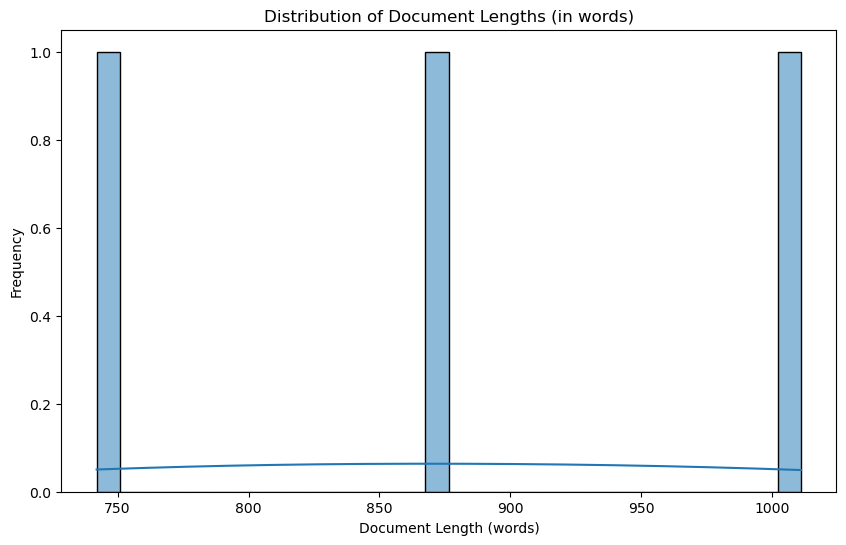

In [45]:
# Document Length Distribution (number of words)
plt.figure(figsize=(10, 6))
sns.histplot(df['length'], bins=30, kde=True)
plt.title('Distribution of Document Lengths (in words)')
plt.xlabel('Document Length (words)')
plt.ylabel('Frequency')
plt.show()

In [47]:
# Most Frequent Words Across Documents
# Combine all document content into one large text
combined_text = " ".join(df['content'])

# Tokenize and count word frequencies
word_freq = Counter(combined_text.lower().split())

# Get the most common words (excluding common stop words)
common_words = word_freq.most_common(20)
print("Most Common Words:")
print(common_words)



Most Common Words:
[('and', 153), ('to', 102), ('the', 76), ('of', 62), ('ai', 55), ('data', 48), ('-', 42), ('our', 34), ('####', 30), ('in', 28), ('all', 25), ('ethical', 25), ('policy', 24), ('this', 24), ('for', 24), ('a', 23), ('that', 23), ('with', 21), ('is', 19), ('or', 19)]


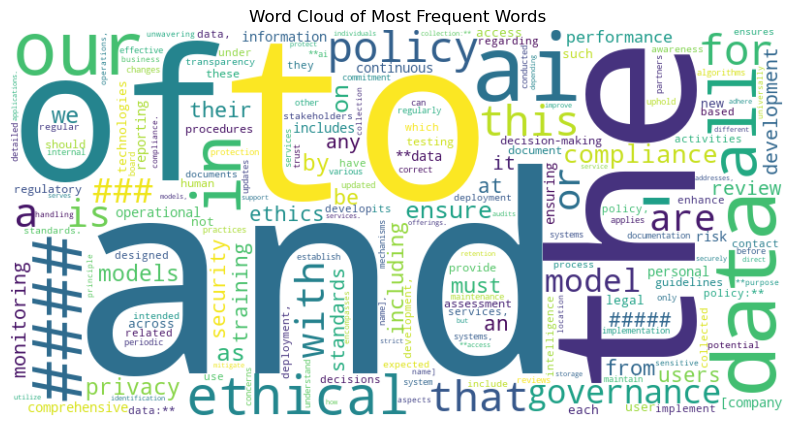

In [49]:
# Word Cloud of Frequent Words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Most Frequent Words')
plt.axis('off')
plt.show()



In [51]:
# Top N Important Words Using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['content'])


In [53]:
# Create a DataFrame to display the TF-IDF features
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=df['filename'])
print("Top TF-IDF Terms:")
print(tfidf_df.T)

Top TF-IDF Terms:
filename     Policy_1.txt  Policy_2.txt  Policy_3.txt
ai               0.047533      0.820838      0.603627
company          0.047533      0.105915      0.056590
compliance       0.110910      0.026479      0.169770
data             0.903122      0.079436      0.056590
deployment       0.000000      0.068192      0.194320
development      0.000000      0.136384      0.218610
ensure           0.047533      0.026479      0.150907
ethical          0.031688      0.317744      0.207497
ethics           0.000000      0.340961      0.024290
governance       0.000000      0.034096      0.364350
including        0.031688      0.132393      0.037727
information      0.142816      0.000000      0.048580
model            0.020402      0.000000      0.364350
models           0.020402      0.000000      0.315770
policy           0.221819      0.185351      0.245224
privacy          0.183621      0.000000      0.048580
security         0.142816      0.000000      0.048580
standards 

In [55]:
#  Metadata Overview
print("Metadata Summary:")
metadata_df = df[['filename', 'num_paragraphs']]
print(metadata_df.head())

# If you want to see the first few document contents as well
print("First few documents:")
print(df['content'].head())

Metadata Summary:
       filename  num_paragraphs
0  Policy_1.txt              97
1  Policy_2.txt              56
2  Policy_3.txt              89
First few documents:
0    ### Comprehensive Data Privacy Policy\n\n**1. ...
1    ### Comprehensive AI Ethics Policy Document\n\...
2    ## Model Governance Policy\n\n### 1. Introduct...
Name: content, dtype: object


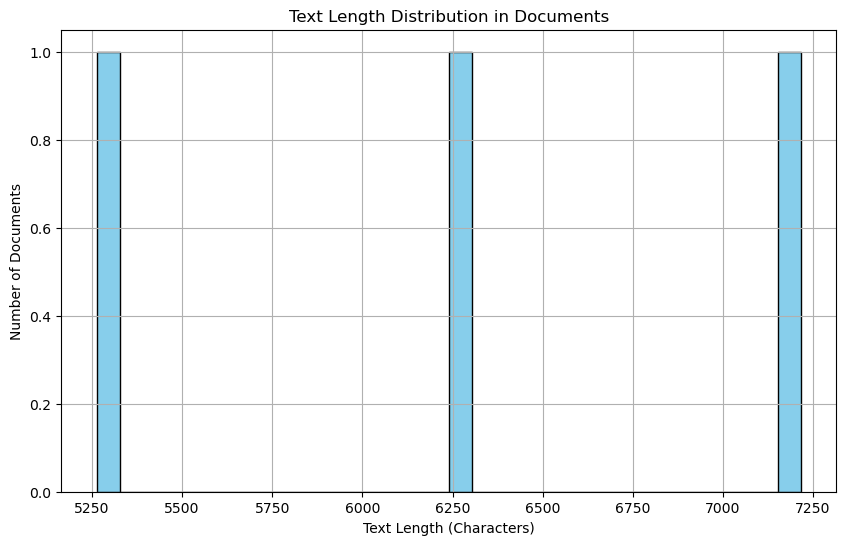

In [69]:
# Load documents
docs = load_txt_files(directory_path)

# Convert documents to DataFrame for easier manipulation
df = pd.DataFrame([{
    "text": doc.page_content,
    "filename": doc.metadata["source"],
} for doc in docs])

# 1. Text Length Distribution
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=30, color='skyblue', edgecolor='black')
plt.title("Text Length Distribution in Documents")
plt.xlabel("Text Length (Characters)")
plt.ylabel("Number of Documents")
plt.grid(True)
plt.show()

In [ ]:
# Most Frequent Words (Excluding Stopwords)
all_text = ' '.join(df['text'].values)
words = re.findall(r'\b\w+\b', all_text.lower())
filtered_words = [word for word in words if word not in ENGLISH_STOP_WORDS]

word_counts = Counter(filtered_words)
most_common_words = word_counts.most_common(20)

<Figure size 1200x600 with 0 Axes>

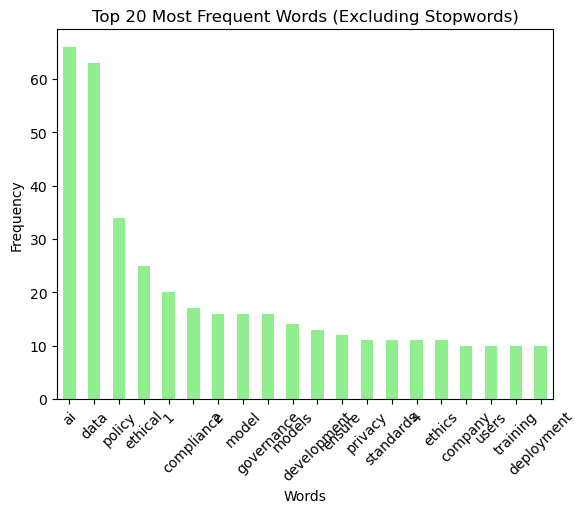

In [71]:

#Plotting most frequent words
word_freq_df = pd.DataFrame(most_common_words, columns=["Word", "Frequency"])

plt.figure(figsize=(12, 6))
word_freq_df.plot(kind='bar', x='Word', y='Frequency', legend=False, color='lightgreen')
plt.title("Top 20 Most Frequent Words (Excluding Stopwords)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


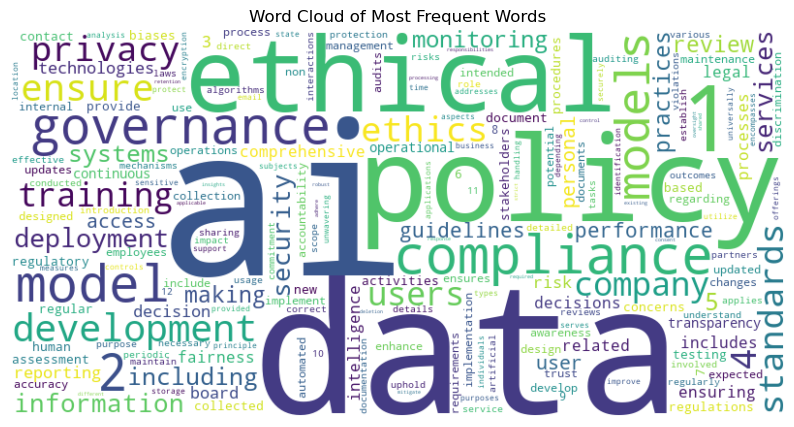

In [73]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Words")
plt.show()


In [75]:
# Top N Longest Sentences
def get_longest_sentences(text, n=5):
    sentences = sent_tokenize(text)  # Tokenize text into sentences
    sentence_lengths = [(sentence, len(sentence.split())) for sentence in sentences]
    sorted_sentences = sorted(sentence_lengths, key=lambda x: x[1], reverse=True)
    return sorted_sentences[:n]


Document: Policy_1.txt
Sentence: Data Storage and Management**

**Data Storage Locations:**  
Data is securely stored in state-of-the-art data centers located in the United States, the European Union, and other jurisdictions, depending on the nature of the data and the services provided.
Length: 37 words

Sentence: This Data Privacy Policy is designed to transparently communicate our unwavering commitment to the protection of personal information across all aspects of our operations, reflecting our dedication to ethical practices and legal compliance.
Length: 33 words

Sentence: Data Sharing and Disclosure**

**Circumstances Under Which Data is Shared:**
- **Service Providers:** Sharing with trusted partners who provide data processing services on our behalf, under strict confidentiality agreements.
Length: 29 words

Sentence: It encompasses all forms of data handling activities related to our services, products, and platforms, irrespective of the data collection medium or geographic l

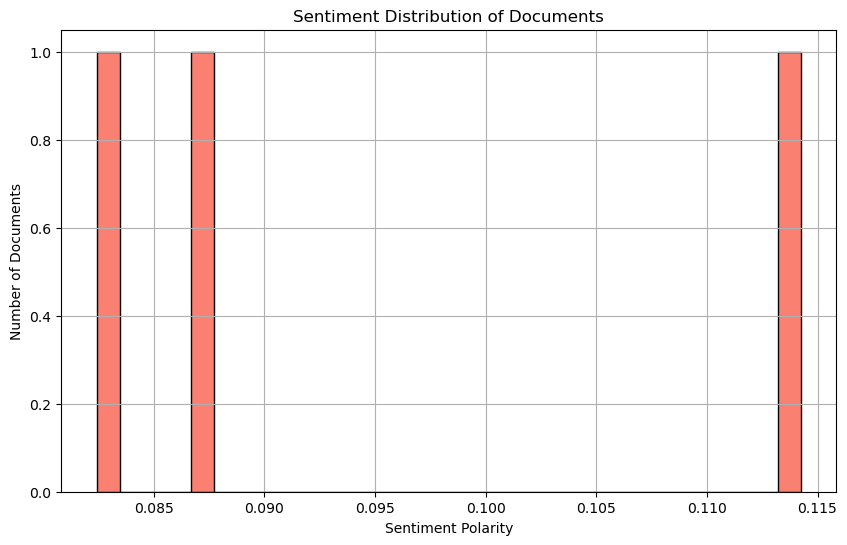

In [77]:
# Display the top 5 longest sentences from each document
for idx, row in df.iterrows():
    print(f"Document: {row['filename']}")
    longest_sentences = get_longest_sentences(row['text'])
    for sentence, length in longest_sentences:
        print(f"Sentence: {sentence}\nLength: {length} words\n")
    print("="*50)

# Sentiment Analysis
def sentiment_analysis(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['sentiment'] = df['text'].apply(sentiment_analysis)

# Plotting sentiment analysis distribution
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment'], bins=30, color='salmon', edgecolor='black')
plt.title("Sentiment Distribution of Documents")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Number of Documents")
plt.grid(True)
plt.show()



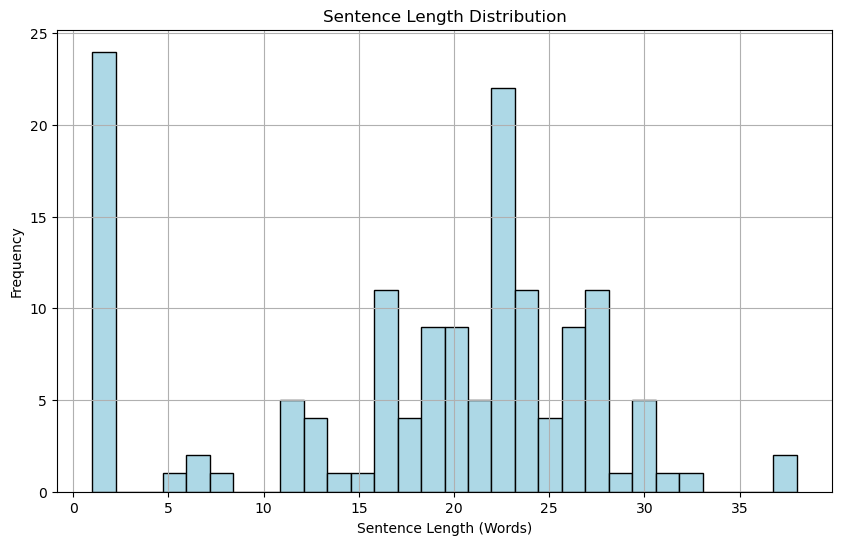

Document with the most words: Policy_3.txt
Word Count: 1011


In [81]:
# Most Frequent Sentence Lengths
sentence_lengths = [len(sentence.split()) for text in df['text'] for sentence in sent_tokenize(text)]
plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=30, color='lightblue', edgecolor='black')
plt.title("Sentence Length Distribution")
plt.xlabel("Sentence Length (Words)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Document with Most Words
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
max_word_count = df.loc[df['word_count'].idxmax()]
print(f"Document with the most words: {max_word_count['filename']}")
print(f"Word Count: {max_word_count['word_count']}")

#RAG implementation and evaluation

In [87]:
#Setting up environment
import os
from langchain_core.documents import Document
from langchain_core.vectorstores import InMemoryVectorStore
from langchain.embeddings import OpenAIEmbeddings  # Import the OpenAI embeddings
from langchain.prompts import PromptTemplate
from langchain.llms import OpenAI
from langgraph.graph import START, StateGraph
from typing import List, Dict
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings
import re
from langchain import hub
#from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict
from langchain_core.prompts import PromptTemplate

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = "**********************************************"
os.environ["OPENAI_API_KEY"] = "***************************************************************************************************************"


In [89]:
#Initialize
llm = ChatOpenAI(model="gpt-4o-mini")


In [91]:
# Load your policy documents from text files
def load_txt_files(directory_path):
    documents = []
    for filename in os.listdir(directory_path):
        if filename.endswith(".txt"):
            with open(os.path.join(directory_path, filename), 'r', encoding='utf-8') as file:
                file_content = file.read()
                documents.append(Document(page_content=file_content, metadata={"source": filename}))
    return documents

In [93]:
# Function to chunk document based on section headers
def section_based_chunking(text):
    section_pattern = r'(\*\*[\d\.]+.*?\*\*)'
    sections = re.split(section_pattern, text)
    chunks = []
    for i in range(1, len(sections), 2):
        section_header = sections[i]
        section_content = sections[i + 1].strip() if i + 1 < len(sections) else ""
        chunks.append(Document(page_content=section_header + "\n\n" + section_content))
    return chunks

In [95]:
# Initialize the OpenAI embeddings model
embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

# Instantiate the vector store with the embeddings model
vector_store = InMemoryVectorStore(embedding=embedding_model)

# Example directory path
directory_path = 'C:/Users/...................'

# Load documents and chunk them if necessary
docs = load_txt_files(directory_path)

# Combine all documents content into a single text
combined_text = "\n\n".join(doc.page_content for doc in docs)

# Apply the section-based chunking method
section_chunks = section_based_chunking(combined_text)

# If no further splitting is needed, use the section_chunks as the final chunks
all_splits = section_chunks

# Index chunks
_ = vector_store.add_documents(documents=all_splits)


In [97]:
# Define prompt template
template = """Use the following pieces of context to answer the question at the end.
If you don't know the answer, just say that you don't know, don't try to make up an answer.
Always say "thanks for asking!" at the end of the answer.

{context}

Question: {question}

Helpful Answer:"""
custom_rag_prompt = PromptTemplate.from_template(template)


In [99]:
# Define state for application
class State(TypedDict):
    question: str
    context: List[Document]
    answer: str

In [101]:
# Define application steps
def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["question"])
    # Print the retrieved documents for debugging
    #for doc in retrieved_docs:
        #print(doc.page_content[:200])  # Print the first 200 characters of each document
    return {"context": retrieved_docs}



In [103]:

def generate(state: State):
    # Combine the content of the retrieved documents
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = custom_rag_prompt.invoke({"question": state["question"], "context": docs_content})
    response = OpenAI().invoke(messages)  # Using OpenAI API to generate the answer
    return {"answer": response}



In [105]:
# Define test data (just for tracking questions, answers, etc.)
test_data = [
    {
        "question": "Can you describe the governance structure discussed in the model governance policy?",
        "expected_answer": "The governance structure has roles and responsabilities and decision making authorities.he AI Governance Board oversees all AI initiatives and ensures adherence to this policy.Model Owners are responsible for the performance and compliance of specific AI models. Data Scientists tasked with the development and fine tuning of AI models according to ethical guidelines"
    },
    {
        "question": "What is the definition of artificial intelligence in the context of the comprehensive AI ethics policy?",
        "expected_answer": "Systems or machines that simulate human intelligence processes, capable of learning from data and experience, making autonomous decisions, and performing tasks traditionally requiring human intelligence"
    },
    # Add more test cases here
]



In [107]:
# Evaluation functions
def evaluate_groundedness(answer: str, retrieved_docs: List[Document]) -> float:
    """Check if the answer is grounded in the retrieved documents."""
    for doc in retrieved_docs:
        # Search for significant content overlap (e.g., key sentences)
        doc_content = doc.page_content.lower()
        if any(sentence in answer.lower() for sentence in doc_content.split('.')):
            return 1.0  # Found a match
    return 0.0  # No match


def evaluate_completeness(answer: str, expected_answer: str) -> float:
    """Check if the answer contains all key points from the expected answer."""
    missing_elements = [word for word in expected_answer.split() if word not in answer]
    return 1.0 if not missing_elements else len(set(expected_answer.split()) - set(missing_elements)) / len(expected_answer.split())

def evaluate_relevance(answer: str, expected_answer: str) -> float:
    """Check if the answer is relevant to the question."""
    answer_tokens = set(answer.split())
    expected_tokens = set(expected_answer.split())
    return len(answer_tokens & expected_tokens) / len(expected_tokens)



In [109]:
# Main evaluation function
def evaluate_rag_model(test_data: List[Dict]):
    results = {
        "groundedness": [],
        "completeness": [],
        "relevance": [],
    }

    for data in test_data:
        question = data["question"]
        expected_answer = data["expected_answer"]

        # Create the state for the RAG model
        state = {"question": question, "context": [], "answer": ""}
        
        # Retrieve the relevant documents based on the question
        state["context"] = retrieve(state)["context"]

        # Generate the answer based on the retrieved documents
        response = generate(state)
        answer = response["answer"]

        # Calculate metrics
        results["groundedness"].append(evaluate_groundedness(answer, state["context"]))
        results["completeness"].append(evaluate_completeness(answer, expected_answer))
        results["relevance"].append(evaluate_relevance(answer, expected_answer))

    # Aggregate results
    aggregated_results = {metric: sum(scores) / len(scores) for metric, scores in results.items()}
    return aggregated_results



In [111]:
# Run evaluation
evaluation_results = evaluate_rag_model(test_data)
print("Evaluation Results:")
print(evaluation_results)

**9. Conclusion**

At [Company Name], we are dedicated to maintaining the trust of our users by adhering to the highest standards of data privacy and security. We encourage all users to review this po
**7. Policy Enforcement and Compliance**

**Compliance with Laws and Regulations:**  
Our policy adheres to international, federal, and state regulations, ensuring compliance with laws such as GDPR, C
**1. Introduction**

**Purpose of the Policy:**  
At [Company Name], safeguarding the privacy and security of personal data is a foundational principle of our business operations. This Data Privacy Po
**3. Data Storage and Management**

**Data Storage Locations:**  
Data is securely stored in state-of-the-art data centers located in the United States, the European Union, and other jurisdictions, de
**9. Conclusion**

At [Company Name], we are dedicated to maintaining the trust of our users by adhering to the highest standards of data privacy and security. We encourage all users to review thi

In [113]:
!pip freeze > requirements.txt

In [115]:
with open('requirements.txt', 'r') as f:
    print(f.read())

aext-assistant @ file:///C:/b/abs_7e0qjcige6/croot/aext-assistant_1717062202219/work
aext-assistant-server @ file:///C:/b/abs_261y2c9vsm/croot/aext-assistant-server_1717060019302/work
aext-core @ file:///C:/b/abs_1e882xlg8y/croot/aext-core_1717056431204/work
aext-core-server @ file:///C:/b/abs_24av6ljtvu/croot/aext-core-server_1717075079138/work
aext-panels @ file:///C:/b/abs_44bc4hv663/croot/aext-panels_1717062218055/work
aext-panels-server @ file:///C:/b/abs_7f9_48fhp3/croot/aext-panels-server_1717060738001/work
aext-share-notebook @ file:///C:/b/abs_4bhc14ko2x/croot/aext-share-notebook_1717059348177/work
aext-share-notebook-server @ file:///C:/b/abs_2b3c16a8t0/croot/aext-share-notebook-server_1717057990383/work
aext-shared @ file:///C:/b/abs_1ex0tj8g9m/croot/aext-shared_1716991146845/work
aiobotocore @ file:///C:/b/abs_a0zxrsvpwx/croot/aiobotocore_1714464454692/work
aiofiles @ file:///C:/b/abs_9ex6mi6b56/croot/aiofiles_1683773603390/work
aiohappyeyeballs @ file:///C:/b/abs_e94qbm2tk

'C:\\Users\\rober'